## The Titanic

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

Titanic has inspired countless books, articles and films (including the 1997 “Titanic” movie starring Kate Winslet and Leonardo DiCaprio), and the ship story has entered the public consciousness as a cautionary tale about the perils of human hubris.

<center><img src="https://assets.editorial.aetnd.com/uploads/2012/04/sinking-of-the-titanic-gettyimages-542907919-1.jpg" /></center>

Source: [History.com](https://www.history.com/topics/early-20th-century-us/titanic)

***
### Titanic Dataset

The Titanic dataset provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival.

Author: Frank E. Harrell Jr., Thomas Cason <br>
Source: [Vanderbilt Biostatistics](https://hbiostat.org/data/repo/titanic.html) <br>

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The Titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the Titanic data using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variables created.

***
### Retrieving Data

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName('myApp') \
.setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession(sc) 

24/05/18 01:11:50 WARN Utils: Your hostname, Leonardos-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.2.106 instead (on interface en0)
24/05/18 01:11:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/18 01:11:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/18 01:12:07 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('__').appName('__').getOrCreate()
> ```

</details>
</div>

In [2]:
# Read the CSV file containing Titanic dataset into Spark's DataFrame and show it

df = spark.read.format('csv').options(header=True).load('train.csv')
df.show(30, truncate=50)

+-----------+--------+------+--------------------------------------------------+------+----+-----+-----+----------------+-------+-----------+--------+
|PassengerId|Survived|Pclass|                                              Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------------------------------------+------+----+-----+-----+----------------+-------+-----------+--------+
|          1|       0|     3|                           Braund, Mr. Owen Harris|  male|  22|    1|    0|       A/5 21171|   7.25|       NULL|       S|
|          2|       1|     1|Cumings, Mrs. John Bradley (Florence Briggs Tha...|female|  38|    1|    0|        PC 17599|71.2833|        C85|       C|
|          3|       1|     3|                            Heikkinen, Miss. Laina|female|  26|    0|    0|STON/O2. 3101282|  7.925|       NULL|       S|
|          4|       1|     1|      Futrelle, Mrs. Jacques Heath (Lily May Peel)|female|  35|  

24/05/17 08:11:47 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df = spark.read.format('csv').options(header=True).load('__')
df.show(truncate=50)
> ```

</details>
</div>

In [3]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [4]:
# Define a UDF function to remove quotes from the passenger's name

def remove_quotes(name):
    return name.replace('\"\"', '*').strip('"').replace('*','"')

remove_quotes_udf = udf(lambda x: remove_quotes(x))

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
def remove_quotes(name):
    return name.replace('\"\"', '*').strip('"').replace('*', '"')
> ```

</details>
</div>

In [5]:
# Remove quotes from the passenger's name

df = df.withColumn('Name', remove_quotes_udf('Name'))
df.show(30, truncate=50)

+-----------+--------+------+--------------------------------------------------+------+----+-----+-----+----------------+-------+-----------+--------+
|PassengerId|Survived|Pclass|                                              Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------------------------------------+------+----+-----+-----+----------------+-------+-----------+--------+
|          1|       0|     3|                           Braund, Mr. Owen Harris|  male|  22|    1|    0|       A/5 21171|   7.25|       NULL|       S|
|          2|       1|     1|Cumings, Mrs. John Bradley (Florence Briggs Tha...|female|  38|    1|    0|        PC 17599|71.2833|        C85|       C|
|          3|       1|     3|                            Heikkinen, Miss. Laina|female|  26|    0|    0|STON/O2. 3101282|  7.925|       NULL|       S|
|          4|       1|     1|      Futrelle, Mrs. Jacques Heath (Lily May Peel)|female|  35|  

| Field         | Description                                              |
|---------------|----------------------------------------------------------|
| *PassengerId* | Unique Id of a passenger                                 |
| *Survived*    | Survival (0 = No, 1 = Yes)                               |
| *Pclass*      | Ticket class                                             |
| *Sex*         | Sex                                                      |
| *Age*         | Age in years                                             |
| *SibSp*       | # of siblings / spouses aboard the Titanic               |
| *Parch*       | # of parents / children aboard the Titanic               |
| *Ticket*      | Ticket number                                            |
| *Fare*        | Passenger fare                                           |
| *Cabin*       | Cabin number                                             |
| *Embarked*    | Port of Embarkation (Southampton, Cherbourg, Queenstown) |

***
### Summary Statistics

In [6]:
# Show the summary statistics of data
#SHOW NUMERIC COLUMN ONLY
df.select("Survived", "Pclass", "Age", "SibSp", "Parch", "Fare").summary().show()

24/05/17 08:12:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+------------------+------------------+------------------+-------------------+-----------------+
|summary|           Survived|            Pclass|               Age|             SibSp|              Parch|             Fare|
+-------+-------------------+------------------+------------------+------------------+-------------------+-----------------+
|  count|                891|               891|               714|               891|                891|              891|
|   mean| 0.3838383838383838| 2.308641975308642| 29.69911764705882|0.5230078563411896|0.38159371492704824| 32.2042079685746|
| stddev|0.48659245426485753|0.8360712409770491|14.526497332334035|1.1027434322934315| 0.8060572211299488|49.69342859718089|
|    min|                  0|                 1|              0.42|                 0|                  0|                0|
|    25%|                0.0|               2.0|              20.0|               0.0|                0.0|           7.8958|


<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.summary().show()
> ```

</details>
</div>

<div class="alert alert-block alert-warning">
<strong>QUESTION</strong>

What's wrong with the summary statistics?
</div>

<details><summary><em>Hint:</em></summary>
    Anything strange with the age?
</details>

In [7]:
# Retrieve records where Age is below 1 year old
df.select('*').filter('Age < 1').show()

+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|   Fare|  Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-------+--------+
|         79|       1|     2|Caldwell, Master....|  male|0.83|    0|    2|248738|     29|   NULL|       S|
|        306|       1|     1|Allison, Master. ...|  male|0.92|    1|    2|113781| 151.55|C22 C26|       S|
|        470|       1|     3|Baclini, Miss. He...|female|0.75|    2|    1|  2666|19.2583|   NULL|       C|
|        645|       1|     3|Baclini, Miss. Eu...|female|0.75|    2|    1|  2666|19.2583|   NULL|       C|
|        756|       1|     2|Hamalainen, Maste...|  male|0.67|    1|    1|250649|   14.5|   NULL|       S|
|        804|       1|     3|Thomas, Master. A...|  male|0.42|    0|    1|  2625| 8.5167|   NULL|       C|
|        832|       1|     2|Richards

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select('*').filter('Age like "0.%"').show()
> ```

</details>
</div>

In [8]:
# Try to print the schema

df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.printSchema()
> ```

</details>
</div>

In [9]:
# Print distinct values for particular columns

df.select('Survived').distinct().sort('Survived').show()
df.select('Pclass').distinct().sort('Pclass').show()
df.select('Sex').distinct().sort('Sex').show()
df.select('SibSp').distinct().sort('SibSp').show()
df.select('Parch').distinct().sort('Parch').show()
df.select('Embarked').distinct().sort('Embarked').show()

+--------+
|Survived|
+--------+
|       0|
|       1|
+--------+

+------+
|Pclass|
+------+
|     1|
|     2|
|     3|
+------+

+------+
|   Sex|
+------+
|female|
|  male|
+------+

+-----+
|SibSp|
+-----+
|    0|
|    1|
|    2|
|    3|
|    4|
|    5|
|    8|
+-----+

+-----+
|Parch|
+-----+
|    0|
|    1|
|    2|
|    3|
|    4|
|    5|
|    6|
+-----+

+--------+
|Embarked|
+--------+
|    NULL|
|       C|
|       Q|
|       S|
+--------+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select('___').distinct().sort('___').show()
> ```

</details>
</div>

In [10]:
# Correct the data types of some columns

df = df.withColumn('Survived', col('Survived').cast('integer'))
df = df.withColumn('Pclass', col('Pclass').cast('integer'))
df = df.withColumn('SibSp', col('SibSp').cast('integer'))
df = df.withColumn('Parch', col('Parch').cast('integer'))
df = df.withColumn('Age', col('Age').cast('double'))
df = df.withColumn('Fare', col('Fare').cast('integer'))

df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: integer (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df = df.withColumn('__', col('__').cast('__'))
> ```

</details>
</div>

In [11]:
# Check the summary statistics again
df.select("Survived", "Pclass", "Age", "SibSp", "Parch", "Fare").summary().show()

+-------+-------------------+------------------+------------------+------------------+-------------------+-----------------+
|summary|           Survived|            Pclass|               Age|             SibSp|              Parch|             Fare|
+-------+-------------------+------------------+------------------+------------------+-------------------+-----------------+
|  count|                891|               891|               714|               891|                891|              891|
|   mean| 0.3838383838383838| 2.308641975308642| 29.69911764705882|0.5230078563411896|0.38159371492704824|31.78563411896745|
| stddev|0.48659245426485753|0.8360712409770491|14.526497332334035|1.1027434322934315| 0.8060572211299488|49.70372961066204|
|    min|                  0|                 1|              0.42|                 0|                  0|                0|
|    25%|                  0|                 2|              20.0|                 0|                  0|                7|


***
### Missing Values

In [12]:
# Count the number of missing values on each column

df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()
> ```

</details>
</div>

<div class="alert alert-block alert-warning">
<strong>QUESTION</strong>

Can you fill the missing values in 'Embarked' and 'Age'?
</div>

<details><summary><em>Hint:</em></summary>
    Using the mode, average, median, etc.
</details>

##### Where was Titanic going?
The Titanic was on her maiden voyage, a return trip from Britain to America. The outward route was to be <strong>S</strong>outhampton (England) – <strong>C</strong>herbourg (France) – <strong>Q</strong>ueenstown (Ireland) – New York (USA). The return route was going to be New York – Plymouth (England) – Cherbourg – Southampton.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png" /></center>

In [13]:
# Show the records with null value on column Embarked

df.select('*').filter(df.Embarked.isNull()).show(truncate=50)

+-----------+--------+------+-----------------------------------------+------+----+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|                                     Name|   Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+-----------------------------------------+------+----+-----+-----+------+----+-----+--------+
|         62|       1|     1|                      Icard, Miss. Amelie|female|38.0|    0|    0|113572|  80|  B28|    NULL|
|        830|       1|     1|Stone, Mrs. George Nelson (Martha Evelyn)|female|62.0|    0|    0|113572|  80|  B28|    NULL|
+-----------+--------+------+-----------------------------------------+------+----+-----+-----+------+----+-----+--------+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select('*').filter(df.Embarked.isNull()).show(truncate=50)
> ```

</details>
</div>

In [14]:
# Count the number of passengers embarking from each port

print(df.filter(df.Embarked == 'S').count())
print(df.filter(df.Embarked == 'C').count())
print(df.filter(df.Embarked == 'Q').count())

644
168
77


<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
print(df.filter(df.Embarked == '_').count())
> ```

</details>
</div>

In [15]:
# Fill the Embarked's missing value with the mode (i.e., most frequent value)

df = df.fillna({'Embarked': 'S'})
df.show()
df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|  71|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|   7| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|  53| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|          330877|   8| NULL|  

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df = df.fillna({'Embarked':'_'})
> ```

</details>
</div>

##### English honorifics
An honorific is a form of address conveying esteem, courtesy or respect. These can be titles prefixing a person’s name, e.g.: Mr, Mrs, Miss, Ms, Mx, Sir, Dame, Dr, Cllr, Lady or Lord, or titles or positions that can appear as a form of address without the person’s name, as in Mr President, General, Captain, Father, Doctor or Earl.

Source: [Wikipedia](https://en.wikipedia.org/wiki/English_honorifics)

In [16]:
# Define a UDF function to extract the passenger's title

def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

extract_title_udf = udf(lambda x: extract_title(x))

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
> def extract_title(name):
>     return name.split(",")[1].split(".")[0].strip()
> 
> extract_title_udf = udf(lambda x: extract_title(x))
> ```

</details>
</div>

In [17]:
# Add a new 'Title' column on the data

df = df.withColumn('pTitle', extract_title_udf('Name'))
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|pTitle|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7| NULL|       S|    Mr|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|  71|  C85|       C|   Mrs|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|   7| NULL|       S|  Miss|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|  53| C123|       S|   Mrs|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8| NULL|       S|    Mr|
|          6|       0|     3|    Moran, Mr. Jame

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df = df.withColumn('__', extract_title_udf('__'))
> ```

</details>
</div>

In [18]:
# Determine the average Age based on the Title

age_df = df.select(["pTitle", "Age"]).groupby('pTitle').avg()
age_df.show()

+------------+------------------+
|      pTitle|          avg(Age)|
+------------+------------------+
|         Don|              40.0|
|        Miss|21.773972602739725|
|         Col|              58.0|
|         Rev|43.166666666666664|
|        Lady|              48.0|
|      Master| 4.574166666666667|
|         Mme|              24.0|
|        Capt|              70.0|
|          Mr|32.368090452261306|
|          Dr|              42.0|
|         Mrs|35.898148148148145|
|         Sir|              49.0|
|    Jonkheer|              38.0|
|        Mlle|              24.0|
|       Major|              48.5|
|          Ms|              28.0|
|the Countess|              33.0|
+------------+------------------+



In [19]:
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|pTitle|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7| NULL|       S|    Mr|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|  71|  C85|       C|   Mrs|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|   7| NULL|       S|  Miss|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|  53| C123|       S|   Mrs|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8| NULL|       S|    Mr|
|          6|       0|     3|    Moran, Mr. Jame

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
age_df = df.select(['__', '__']).groupby('__').avg()
> ```

</details>
</div>

In [20]:
# Fill the Age's missing value with the average Age (based on the Title)

df = df.join(age_df, on='pTitle', how='inner')

# Use coalesce to fill missing values in 'Age' with 'avgAge'
# Make sure to use col() to reference columns
df = df.withColumn('Age', coalesce(col('Age'), col('avg(Age)')))

# Drop the 'avgAge' column if no longer needed
df = df.drop('avg(Age)')

# Show the DataFrame to confirm that missing 'Age' values are filled
df.show()
df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()

+------+-----------+--------+------+--------------------+------+------------------+-----+-----+----------------+----+-----+--------+
|pTitle|PassengerId|Survived|Pclass|                Name|   Sex|               Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|
+------+-----------+--------+------+--------------------+------+------------------+-----+-----+----------------+----+-----+--------+
|    Mr|          1|       0|     3|Braund, Mr. Owen ...|  male|              22.0|    1|    0|       A/5 21171|   7| NULL|       S|
|   Mrs|          2|       1|     1|Cumings, Mrs. Joh...|female|              38.0|    1|    0|        PC 17599|  71|  C85|       C|
|  Miss|          3|       1|     3|Heikkinen, Miss. ...|female|              26.0|    0|    0|STON/O2. 3101282|   7| NULL|       S|
|   Mrs|          4|       1|     1|Futrelle, Mrs. Ja...|female|              35.0|    1|    0|          113803|  53| C123|       S|
|    Mr|          5|       0|     3|Allen, Mr. Willia...|  male|     

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df = df.join(age_df, on='__', how='inner')
df = df.withColumn('Age', coalesce('Age', '__'))
df = df.drop('__')
> ```

</details>
</div>

***
### Storing Pre-processed Data

In [21]:
df.rdd.getNumPartitions()

1

In [22]:
# Save the pre-processed data to a CSV file (if necessary, firstly combine data into 1 partition)
df.repartition(1).write.option('header', True).option('escape', '"').csv('modified')


AnalysisException: [PATH_ALREADY_EXISTS] Path file:/Users/leonardonickholasandrianto/Documents/Kuliah/Semester 6/BIG DATA/Tugas/modified already exists. Set mode as "overwrite" to overwrite the existing path.

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df = df.repartition(1).write.option('header', True).option('escape', '"').csv('dataset/train_mod')
> ```

</details>
</div>

***
### Survival by Gender

<div class="alert alert-block alert-warning">
<strong>QUESTION</strong>

Can you make a hypothesis regarding the passenger's survival by gender?
</div>

<details><summary><em>Hint:</em></summary>
    Female passengers had higher chance than the male ones to survive.
</details>

In [25]:
# Count the number of male and female passengers

df.select(["Sex"]).groupby('Sex').count().show()

+------+-----+
|   Sex|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select(['__']).groupby('__').count().show()
> ```

</details>
</div>

In [26]:
# Count the number of survived and unsurvived passengers based on gender

df.select(["Sex", "Survived"]).groupby(["Sex", "Survived"]).count().orderBy("Sex").show()

+------+--------+-----+
|   Sex|Survived|count|
+------+--------+-----+
|female|       1|  233|
|female|       0|   81|
|  male|       0|  468|
|  male|       1|  109|
+------+--------+-----+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select(['__', '__']).groupby(['__', '__']).count().show()
> ```

</details>
</div>

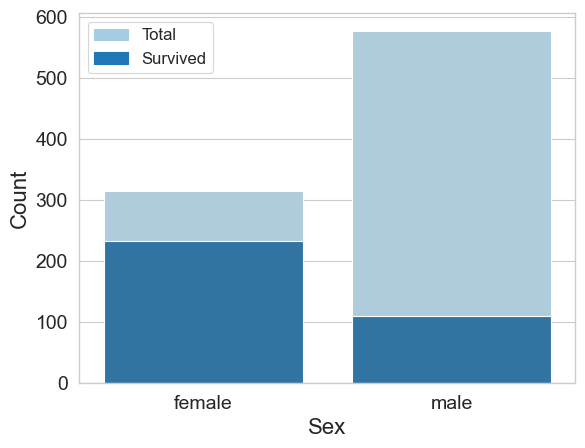

In [27]:
# Using Bar Plot, visualize the survived passengers by gender

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_theme(style='whitegrid')
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})
palette = sns.color_palette('Paired')

total = df.select(["Sex"]).groupby("Sex").count().toPandas()
bar1 = sns.barplot(x='Sex', y='count', data=total, color=palette[0])
bar1.set(ylabel='Count')
bar1.tick_params(labelsize=14)
survived = df.select(['Sex']).filter(col("Survived")==1).groupby('Sex').count().toPandas()
bar2 = sns.barplot(x='Sex', y='count', data=survived, color=palette[1])
bar2.set(ylabel='Count')

top_bar = mpatches.Patch(color=palette[0], label='Total')
bottom_bar = mpatches.Patch(color=palette[1], label='Survived')
plt.legend(handles=[top_bar, bottom_bar], fontsize=12)
plt.show()

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
total = df.select('__').groupby('__').count().toPandas()
survived = df.select('__').filter(__).groupby('__').count().toPandas()
> ```

</details>
</div>

***
### Survival by Class

<div class="alert alert-block alert-warning">
<strong>QUESTION</strong>

Can you make a hypothesis regarding the passenger's survival by class?
</div>

<details><summary><em>Hint:</em></summary>
    The higher the passenger's class (i.e., class 1 is the highest whereas class 3 is the lowest), the higher the passenger's chance to survive.
</details>

In [28]:
# Count the number of passengers based on class

df.select(['Pclass']).groupby('Pclass').count().orderBy('Pclass').show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     2|  184|
|     3|  491|
+------+-----+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select(['__']).groupby('__').count().show()
> ```

</details>
</div>

In [29]:
# Count the number of survived and unsurvived passengers based on class

df.select(['Pclass','Survived']).groupby(['Pclass', 'Survived']).count().orderBy(['Pclass','Survived']).show()

+------+--------+-----+
|Pclass|Survived|count|
+------+--------+-----+
|     1|       0|   80|
|     1|       1|  136|
|     2|       0|   97|
|     2|       1|   87|
|     3|       0|  372|
|     3|       1|  119|
+------+--------+-----+



<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df.select(['__', '__']).groupby(['__', '__']).count().show()
> ```

</details>
</div>

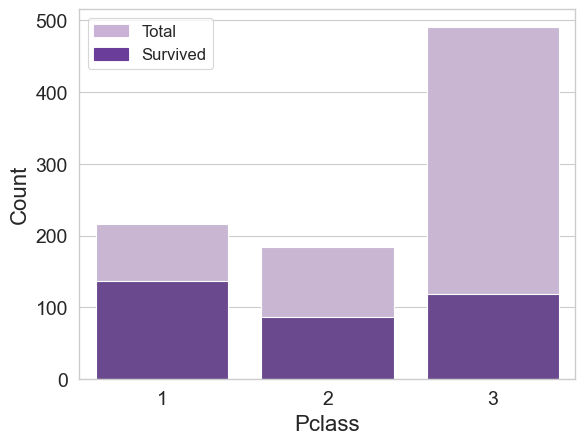

In [30]:
# Using Bar Plot, visualize the survived passengers by class

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

total = df.select(['Pclass']).groupby('Pclass').count().toPandas()
bar1 = sns.barplot(x='Pclass', y='count', data=total, color=palette[8])
bar1.set(ylabel='Count')
bar1.tick_params(labelsize=14)
survived = df.select('Pclass').filter(col('Survived')==1).groupby('Pclass').count().toPandas()
bar2 = sns.barplot(x='Pclass', y='count', data=survived, color=palette[9])
bar2.set(ylabel='Count')

top_bar = mpatches.Patch(color=palette[8], label='Total')
bottom_bar = mpatches.Patch(color=palette[9], label='Survived')
plt.legend(handles=[top_bar, bottom_bar], fontsize=12)
plt.show()

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
total = df.select('__').groupby('__').count().toPandas()
survived = df.select('__').filter(__).groupby('__').count().toPandas()
> ```

</details>
</div>

***
### Survival by Age

<div class="alert alert-block alert-warning">
<strong>QUESTION</strong>

Can you make a hypothesis regarding the passenger's survival by age?
</div>

<details><summary><em>Hint:</em></summary>
    The youngsters and the elders had higher chance to survive.
</details>

In [31]:
# Get the distribution (histogram) of passengers by age

age_hist = df.select("Age").rdd.flatMap(lambda x:x).histogram([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])

print("+-----+-----+")
print("| Age |count|")
print("+-----+-----+")
for i in range(len(age_hist[1])):
    print("|%2d-%2d|%5d|" % (age_hist[0][i], age_hist[0][i+1], age_hist[1][i]))
print("+-----+-----+")

+-----+-----+
| Age |count|
+-----+-----+
| 0- 5|   44|
| 5-10|   22|
|10-15|   16|
|15-20|   86|
|20-25|  150|
|25-30|  106|
|30-35|  214|
|35-40|   89|
|40-45|   49|
|45-50|   41|
|50-55|   32|
|55-60|   16|
|60-65|   15|
|65-70|    4|
|70-75|    6|
|75-80|    1|
+-----+-----+


<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
age_hist = df.select('__').rdd.flatMap(lambda x: x).histogram(__)
> ```

</details>
</div>

In [32]:
# Get the distribution (histogram) of survived and unsurvived passengers by age

age_hist0 = df.select("Age").filter(col("Survived")==0).rdd.flatMap(lambda x: x).histogram([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
age_hist1 = df.select("Age").filter(col("Survived")==1).rdd.flatMap(lambda x: x).histogram([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])

print("+-----+--------+--------+")
print("| Age |count(0)|count(1)|")
print("+-----+--------+--------+")
for i in range(len(age_hist0[1])):
    print("|%2d-%2d|%8d|%8d|" % (age_hist0[0][i], age_hist0[0][i+1], age_hist0[1][i], age_hist1[1][i]))
print("+-----+--------+--------+")

+-----+--------+--------+
| Age |count(0)|count(1)|
+-----+--------+--------+
| 0- 5|      15|      29|
| 5-10|      11|      11|
|10-15|       9|       7|
|15-20|      52|      34|
|20-25|      89|      61|
|25-30|      68|      38|
|30-35|     160|      54|
|35-40|      42|      47|
|40-45|      31|      18|
|45-50|      25|      16|
|50-55|      18|      14|
|55-60|      10|       6|
|60-65|       9|       6|
|65-70|       4|       0|
|70-75|       6|       0|
|75-80|       0|       1|
+-----+--------+--------+


<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
age_hist = df.select('__').filter(__).rdd.flatMap(lambda x: x).histogram(__)
> ```

</details>
</div>

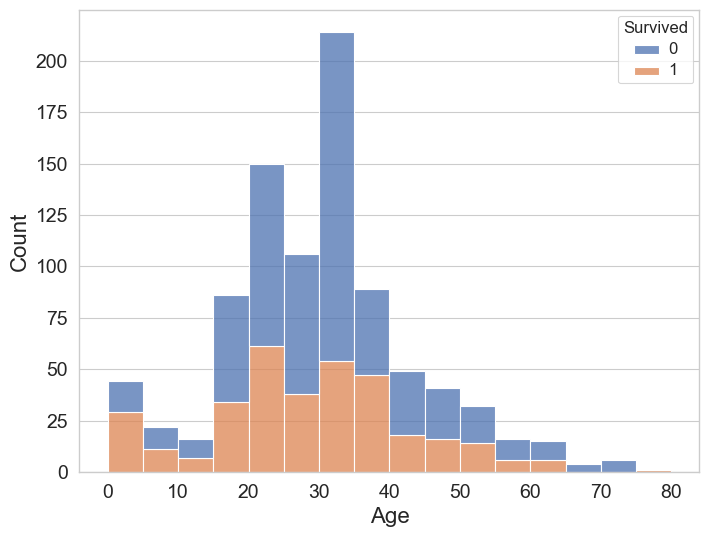

In [33]:
# Visualize the distribution (histogram) of survived passengers by age

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
hist = sns.histplot(data=df.toPandas(), x='Age', binwidth=5, binrange=(0,80), hue="Survived", multiple="stack")
hist.tick_params(labelsize=14)
hist.xaxis.grid(False)
plt.setp(hist.get_legend().get_texts(), fontsize=12) # for legend text
plt.setp(hist.get_legend().get_title(), fontsize=12) # for legend title
plt.show()

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
hist = sns.histplot(data=df.toPandas(), x='__', binwidth=5, binrange=(0,80), hue='__', multiple='stack')
> ```

</details>
</div>

***
### Correlation Matrix

In [34]:
# Convert 'Sex' and 'Embarked' to numeric

df_corr = df.withColumn('Sex', when(col('Sex')=="male",1).when(col('Sex')=="female",0)).withColumn('Embarked', when(col('Embarked')=="S",0).when(col('Embarked')=="C",1).when(col('Embarked')=="Q",2))
df_corr.show()

+------+-----------+--------+------+--------------------+---+------------------+-----+-----+----------------+----+-----+--------+
|pTitle|PassengerId|Survived|Pclass|                Name|Sex|               Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|
+------+-----------+--------+------+--------------------+---+------------------+-----+-----+----------------+----+-----+--------+
|    Mr|          1|       0|     3|Braund, Mr. Owen ...|  1|              22.0|    1|    0|       A/5 21171|   7| NULL|       0|
|   Mrs|          2|       1|     1|Cumings, Mrs. Joh...|  0|              38.0|    1|    0|        PC 17599|  71|  C85|       1|
|  Miss|          3|       1|     3|Heikkinen, Miss. ...|  0|              26.0|    0|    0|STON/O2. 3101282|   7| NULL|       0|
|   Mrs|          4|       1|     1|Futrelle, Mrs. Ja...|  0|              35.0|    1|    0|          113803|  53| C123|       0|
|    Mr|          5|       0|     3|Allen, Mr. Willia...|  1|              35.0|    0|    

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
df_corr = df.withColumn('__', when(__, 0).when(__, 1)...)
> ```

</details>
</div>

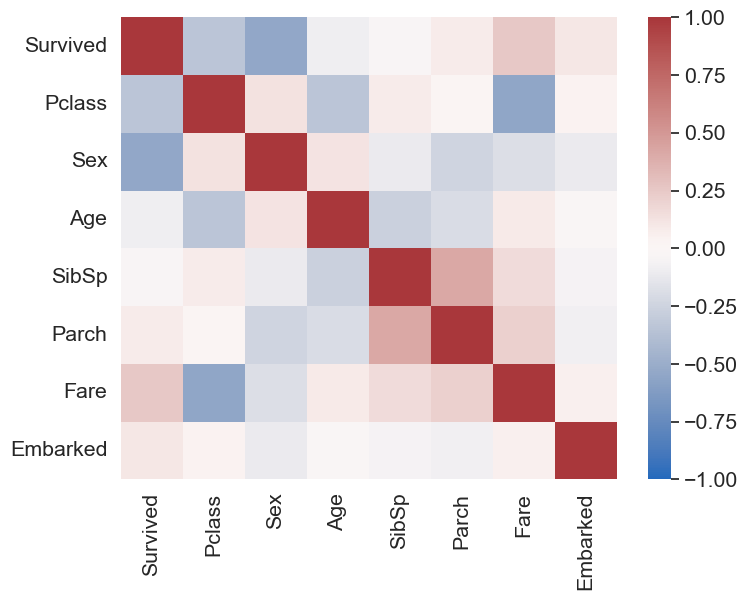

In [35]:
# Generate the correlation matrix

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
heat = sns.heatmap(data=df_corr.select(['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']).toPandas().corr(), cmap='vlag', vmin=-1, vmax=1)

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
heat = sns.heatmap(data=df_corr.select(['__', '__', ...]).toPandas().corr(), cmap='vlag', vmin=-1, vmax=1)
> ```

</details>
</div>

***
##### Stopping SparkContext

In [42]:
spark.stop()

<div class="alert alert-block alert-info">
<details><summary><strong>Tip:</strong></summary>

> ```python
spark.stop()
> ```

</details>
</div>

## CARA DI KELAS

In [2]:
# Read the CSV file containing Titanic dataset into Spark's DataFrame and show it

df = spark.read.format('csv').options(header=True).load('train_mod.csv').repartition(4)
df.show(30, truncate=50)

+-----------+--------+------+-------------------------------------------------+------+------------------+-----+-----+----------------+-------+-------+--------+
|PassengerId|Survived|Pclass|                                             Name|   Sex|               Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|
+-----------+--------+------+-------------------------------------------------+------+------------------+-----+-----+----------------+-------+-------+--------+
|        734|       0|     2|                       Berriman, Mr. William John|  male|              23.0|    0|    0|           28425|   13.0|   NULL|       S|
|        877|       0|     3|                    Gustafsson, Mr. Alfred Ossian|  male|              20.0|    0|    0|            7534| 9.8458|   NULL|       S|
|        736|       0|     3|                             Williams, Mr. Leslie|  male|              28.5|    0|    0|           54636|   16.1|   NULL|       S|
|        488|       0|     1|           

In [3]:
df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [4]:
from pyspark.sql.functions import *

In [5]:
# Define a UDF function to remove quotes from the passenger's name

def remove_quotes(name):
    return name.replace('\"\"', '*').strip('"').replace('*','"')

remove_quotes_udf = udf(lambda x: remove_quotes(x))

In [6]:
df = df.withColumn('Name', remove_quotes_udf('Name'))
df.show(30, truncate=50)

+-----------+--------+------+-------------------------------------------------+------+------------------+-----+-----+----------------+-------+-------+--------+
|PassengerId|Survived|Pclass|                                             Name|   Sex|               Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|
+-----------+--------+------+-------------------------------------------------+------+------------------+-----+-----+----------------+-------+-------+--------+
|        734|       0|     2|                       Berriman, Mr. William John|  male|              23.0|    0|    0|           28425|   13.0|   NULL|       S|
|        877|       0|     3|                    Gustafsson, Mr. Alfred Ossian|  male|              20.0|    0|    0|            7534| 9.8458|   NULL|       S|
|        736|       0|     3|                             Williams, Mr. Leslie|  male|              28.5|    0|    0|           54636|   16.1|   NULL|       S|
|        488|       0|     1|           

In [30]:
df.select('Embarked').summary().show()

+-------+--------+
|summary|Embarked|
+-------+--------+
|  count|     891|
|   mean|    NULL|
| stddev|    NULL|
|    min|       C|
|    25%|    NULL|
|    50%|    NULL|
|    75%|    NULL|
|    max|       S|
+-------+--------+



In [7]:
final_df = df.select(['Survived', 'Pclass', 'Sex', 'Age'])

In [26]:
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

In [9]:
# Change categorical values (e.g., 'Pclass', 'Sex', etc.) to numerical values using StringIndexer

indexers = [StringIndexer(inputCol=col, outputCol=col+'_idx').fit(final_df) for col in ['Pclass','Sex']]
pipeline = Pipeline(stages=indexers)
final_df = pipeline.fit(final_df).transform(final_df)
final_df.show()

+--------+------+------+----+----------+-------+
|Survived|Pclass|   Sex| Age|Pclass_idx|Sex_idx|
+--------+------+------+----+----------+-------+
|       1|     3|female|36.0|       0.0|    1.0|
|       1|     1|female|35.0|       1.0|    1.0|
|       0|     2|  male|16.0|       2.0|    0.0|
|       0|     1|  male|37.0|       1.0|    0.0|
|       0|     3|  male|29.0|       0.0|    0.0|
|       0|     3|  male|29.0|       0.0|    0.0|
|       0|     1|  male|64.0|       1.0|    0.0|
|       1|     2|female|28.0|       2.0|    1.0|
|       0|     2|  male|39.0|       2.0|    0.0|
|       0|     2|  male|24.0|       2.0|    0.0|
|       0|     3|  male|39.0|       0.0|    0.0|
|       0|     3|female|29.0|       0.0|    1.0|
|       1|     2|female|36.0|       2.0|    1.0|
|       0|     3|  male|25.0|       0.0|    0.0|
|       0|     3|  male|25.0|       0.0|    0.0|
|       0|     3|  male|61.0|       0.0|    0.0|
|       0|     1|  male|54.0|       1.0|    0.0|
|       1|     2|fem

In [10]:
final_df = final_df.withColumn('Age', col('Age').cast('double'))

In [11]:
assembler = VectorAssembler(inputCols=['Pclass_idx', 'Sex_idx'], outputCol='features')
final_df = assembler.transform(final_df)
final_df.show(truncate=False)

+--------+------+------+----+----------+-------+---------+
|Survived|Pclass|Sex   |Age |Pclass_idx|Sex_idx|features |
+--------+------+------+----+----------+-------+---------+
|1       |3     |female|36.0|0.0       |1.0    |[0.0,1.0]|
|1       |1     |female|35.0|1.0       |1.0    |[1.0,1.0]|
|0       |2     |male  |16.0|2.0       |0.0    |[2.0,0.0]|
|0       |1     |male  |37.0|1.0       |0.0    |[1.0,0.0]|
|0       |3     |male  |29.0|0.0       |0.0    |(2,[],[])|
|0       |3     |male  |29.0|0.0       |0.0    |(2,[],[])|
|0       |1     |male  |64.0|1.0       |0.0    |[1.0,0.0]|
|1       |2     |female|28.0|2.0       |1.0    |[2.0,1.0]|
|0       |2     |male  |39.0|2.0       |0.0    |[2.0,0.0]|
|0       |2     |male  |24.0|2.0       |0.0    |[2.0,0.0]|
|0       |3     |male  |39.0|0.0       |0.0    |(2,[],[])|
|0       |3     |female|29.0|0.0       |1.0    |[0.0,1.0]|
|1       |2     |female|36.0|2.0       |1.0    |[2.0,1.0]|
|0       |3     |male  |25.0|0.0       |0.0    |(2,[],[]

In [12]:
feature_vector_df = final_df.select(['Age','features', 'Survived'])
feature_vector_df = feature_vector_df.withColumn('Survived',feature_vector_df['Survived'].cast(DoubleType()))
feature_vector_df.show(truncate=False)

+----+---------+--------+
|Age |features |Survived|
+----+---------+--------+
|36.0|[0.0,1.0]|1.0     |
|35.0|[1.0,1.0]|1.0     |
|16.0|[2.0,0.0]|0.0     |
|37.0|[1.0,0.0]|0.0     |
|29.0|(2,[],[])|0.0     |
|29.0|(2,[],[])|0.0     |
|64.0|[1.0,0.0]|0.0     |
|28.0|[2.0,1.0]|1.0     |
|39.0|[2.0,0.0]|0.0     |
|24.0|[2.0,0.0]|0.0     |
|39.0|(2,[],[])|0.0     |
|29.0|[0.0,1.0]|0.0     |
|36.0|[2.0,1.0]|1.0     |
|25.0|(2,[],[])|0.0     |
|25.0|(2,[],[])|0.0     |
|61.0|(2,[],[])|0.0     |
|54.0|[1.0,0.0]|0.0     |
|24.0|[2.0,1.0]|1.0     |
|24.0|[2.0,1.0]|1.0     |
|56.0|[1.0,1.0]|1.0     |
+----+---------+--------+
only showing top 20 rows



In [40]:
(trainData, testData) = feature_vector_df.randomSplit([0.8, 0.2], seed=11)

In [14]:
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier

In [15]:
model1 = RandomForestClassifier(featuresCol='features', labelCol='Survived').fit(trainData)
model2 = GBTClassifier(featuresCol='features', labelCol='Survived').fit(trainData)

In [16]:
predictedData1 = model1.transform(testData)
predictedData1.select(['prediction', 'Survived', 'features']).show()

+----------+--------+---------+
|prediction|Survived| features|
+----------+--------+---------+
|       0.0|     0.0|(2,[],[])|
|       0.0|     1.0|[1.0,0.0]|
|       1.0|     0.0|[0.0,1.0]|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       1.0|     0.0|[0.0,1.0]|
|       1.0|     1.0|[0.0,1.0]|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|[2.0,0.0]|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       1.0|     0.0|[0.0,1.0]|
|       1.0|     1.0|[1.0,1.0]|
|       0.0|     1.0|(2,[],[])|
|       1.0|     1.0|[2.0,1.0]|
|       0.0|     0.0|(2,[],[])|
|       1.0|     1.0|[2.0,1.0]|
+----------+--------+---------+
only showing top 20 rows



In [17]:
predictedData2 = model2.transform(testData)
predictedData2.select(['prediction', 'Survived', 'features']).show()

+----------+--------+---------+
|prediction|Survived| features|
+----------+--------+---------+
|       0.0|     0.0|(2,[],[])|
|       0.0|     1.0|[1.0,0.0]|
|       1.0|     0.0|[0.0,1.0]|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       1.0|     0.0|[0.0,1.0]|
|       1.0|     1.0|[0.0,1.0]|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|[2.0,0.0]|
|       0.0|     0.0|(2,[],[])|
|       0.0|     0.0|(2,[],[])|
|       1.0|     0.0|[0.0,1.0]|
|       1.0|     1.0|[1.0,1.0]|
|       0.0|     1.0|(2,[],[])|
|       1.0|     1.0|[2.0,1.0]|
|       0.0|     0.0|(2,[],[])|
|       1.0|     1.0|[2.0,1.0]|
+----------+--------+---------+
only showing top 20 rows



24/05/18 00:15:50 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/18 00:15:50 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [19]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Survived', metricName='accuracy')

In [20]:
model1_accuracy = evaluator.evaluate(predictedData1)
print('Accuracy of RF classifier    = %g' % (model1_accuracy))
print('Test Error of RF classifier  = %g' % (1.0 - model1_accuracy))

Accuracy of RF classifier    = 0.833333
Test Error of RF classifier  = 0.166667


In [21]:
model2_accuracy = evaluator.evaluate(predictedData2)
print('Accuracy of GBT classifier   = %g' % (model2_accuracy))
print('Test Error of GBT classifier = %g' % (1.0 - model2_accuracy))

Accuracy of GBT classifier   = 0.833333
Test Error of GBT classifier = 0.166667


In [22]:
metrics1 = MulticlassMetrics(predictedData1.select(['prediction', 'Survived']).rdd.map(tuple))
print("RANDOM FOREST Classifier:")
print("Accuracy   = " + str(metrics1.accuracy))
print("Precision  = " + str(metrics1.precision(1.0)))
print("Recall     = " + str(metrics1.recall(1.0)))
print("F1-Measure = " + str(metrics1.fMeasure(1.0)))
metrics1.confusionMatrix().toArray()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


RANDOM FOREST Classifier:
Accuracy   = 0.8333333333333334
Precision  = 0.8181818181818182
Recall     = 0.75
F1-Measure = 0.7826086956521738


array([[96., 12.],
       [18., 54.]])

In [23]:
metrics2 = MulticlassMetrics(predictedData2.select(['prediction', 'Survived']).rdd.map(tuple))
print("GRADIENT-BOOSTED TREE Classifier:")
print("Accuracy   = " + str(metrics2.accuracy))
print("Precision  = " + str(metrics2.precision(1.0)))
print("Recall     = " + str(metrics2.recall(1.0)))
print("F1-Measure = " + str(metrics2.fMeasure(1.0)))
metrics2.confusionMatrix().toArray()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


GRADIENT-BOOSTED TREE Classifier:
Accuracy   = 0.8333333333333334
Precision  = 0.8181818181818182
Recall     = 0.75
F1-Measure = 0.7826086956521738


array([[96., 12.],
       [18., 54.]])

## Tugas Akurasi lebih tinggi

### Fokusnya pada feature engineering dan pemilihan seed

In [4]:
spark.stop()

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName('myApp') \
.setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession(sc) 

24/05/21 22:59:40 WARN Utils: Your hostname, Leonardos-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.2.106 instead (on interface en0)
24/05/21 22:59:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/21 22:59:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.ml.feature import Normalizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [3]:
# Read the CSV file containing Titanic dataset into Spark's DataFrame and show it
df = spark.read.format('csv').options(header=True).load('train_mod.csv').repartition(4)
df.show(30, truncate=50)

+-----------+--------+------+-------------------------------------------------+------+------------------+-----+-----+----------------+-------+-------+--------+
|PassengerId|Survived|Pclass|                                             Name|   Sex|               Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|
+-----------+--------+------+-------------------------------------------------+------+------------------+-----+-----+----------------+-------+-------+--------+
|        734|       0|     2|                       Berriman, Mr. William John|  male|              23.0|    0|    0|           28425|   13.0|   NULL|       S|
|        877|       0|     3|                    Gustafsson, Mr. Alfred Ossian|  male|              20.0|    0|    0|            7534| 9.8458|   NULL|       S|
|        736|       0|     3|                             Williams, Mr. Leslie|  male|              28.5|    0|    0|           54636|   16.1|   NULL|       S|
|        488|       0|     1|           

In [4]:
#Penambahan kolom Family yang dihasilkan dari kolom SibSp ditambah Parch ditambah 1 (dirinya sendiri)
df = df.withColumn('Family', F.col('SibSp') + F.col('Parch') + 1)
df.show(5, truncate=50)

+-----------+--------+------+-----------------------------+----+----+-----+-----+------+------+-----+--------+------+
|PassengerId|Survived|Pclass|                         Name| Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|Family|
+-----------+--------+------+-----------------------------+----+----+-----+-----+------+------+-----+--------+------+
|        734|       0|     2|   Berriman, Mr. William John|male|23.0|    0|    0| 28425|  13.0| NULL|       S|   1.0|
|        877|       0|     3|Gustafsson, Mr. Alfred Ossian|male|20.0|    0|    0|  7534|9.8458| NULL|       S|   1.0|
|        736|       0|     3|         Williams, Mr. Leslie|male|28.5|    0|    0| 54636|  16.1| NULL|       S|   1.0|
|        488|       0|     1|      Kent, Mr. Edward Austin|male|58.0|    0|    0| 11771|  29.7|  B37|       C|   1.0|
|        351|       0|     3|       Odahl, Mr. Nils Martin|male|23.0|    0|    0|  7267| 9.225| NULL|       S|   1.0|
+-----------+--------+------+---------------------------

In [5]:
#Penambahan kolom alone jika kolom familynya lebih dari 1, maka dianggap tidak sendiri
df = df.withColumn('Alone', F.when(F.col('Family') > 1, 0).otherwise(1))
df.show(5, truncate=50)

+-----------+--------+------+-----------------------------+----+----+-----+-----+------+------+-----+--------+------+-----+
|PassengerId|Survived|Pclass|                         Name| Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|Family|Alone|
+-----------+--------+------+-----------------------------+----+----+-----+-----+------+------+-----+--------+------+-----+
|        734|       0|     2|   Berriman, Mr. William John|male|23.0|    0|    0| 28425|  13.0| NULL|       S|   1.0|    1|
|        877|       0|     3|Gustafsson, Mr. Alfred Ossian|male|20.0|    0|    0|  7534|9.8458| NULL|       S|   1.0|    1|
|        736|       0|     3|         Williams, Mr. Leslie|male|28.5|    0|    0| 54636|  16.1| NULL|       S|   1.0|    1|
|        488|       0|     1|      Kent, Mr. Edward Austin|male|58.0|    0|    0| 11771|  29.7|  B37|       C|   1.0|    1|
|        351|       0|     3|       Odahl, Mr. Nils Martin|male|23.0|    0|    0|  7267| 9.225| NULL|       S|   1.0|    1|
+-------

In [6]:
# Mengisi kolom embarked yang null dengan most frequent (S)
df = df.fillna({'Embarked': 'S'})

In [7]:
df.show(20)

+-----------+--------+------+--------------------+------+------------------+-----+-----+-------------+-------+-----+--------+------+-----+
|PassengerId|Survived|Pclass|                Name|   Sex|               Age|SibSp|Parch|       Ticket|   Fare|Cabin|Embarked|Family|Alone|
+-----------+--------+------+--------------------+------+------------------+-----+-----+-------------+-------+-----+--------+------+-----+
|        734|       0|     2|Berriman, Mr. Wil...|  male|              23.0|    0|    0|        28425|   13.0| NULL|       S|   1.0|    1|
|        877|       0|     3|Gustafsson, Mr. A...|  male|              20.0|    0|    0|         7534| 9.8458| NULL|       S|   1.0|    1|
|        736|       0|     3|Williams, Mr. Leslie|  male|              28.5|    0|    0|        54636|   16.1| NULL|       S|   1.0|    1|
|        488|       0|     1|Kent, Mr. Edward ...|  male|              58.0|    0|    0|        11771|   29.7|  B37|       C|   1.0|    1|
|        351|       0|     

24/05/21 22:59:51 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [8]:
def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

extract_title_udf = udf(lambda x: extract_title(x))

In [9]:
df = df.withColumn('pTitle', extract_title_udf('Name'))
df.show()

+-----------+--------+------+--------------------+------+------------------+-----+-----+-------------+-------+-----+--------+------+-----+------+
|PassengerId|Survived|Pclass|                Name|   Sex|               Age|SibSp|Parch|       Ticket|   Fare|Cabin|Embarked|Family|Alone|pTitle|
+-----------+--------+------+--------------------+------+------------------+-----+-----+-------------+-------+-----+--------+------+-----+------+
|        734|       0|     2|Berriman, Mr. Wil...|  male|              23.0|    0|    0|        28425|   13.0| NULL|       S|   1.0|    1|    Mr|
|        877|       0|     3|Gustafsson, Mr. A...|  male|              20.0|    0|    0|         7534| 9.8458| NULL|       S|   1.0|    1|    Mr|
|        736|       0|     3|Williams, Mr. Leslie|  male|              28.5|    0|    0|        54636|   16.1| NULL|       S|   1.0|    1|    Mr|
|        488|       0|     1|Kent, Mr. Edward ...|  male|              58.0|    0|    0|        11771|   29.7|  B37|       C

In [10]:
#DROP kolom yang tidak dipakai
df = df.drop('Name', 'Ticket', 'Cabin', 'Embarked')

df.show(5)

+-----------+--------+------+------+----+-----+-----+--------+------+-----+------+
|PassengerId|Survived|Pclass|   Sex| Age|SibSp|Parch|    Fare|Family|Alone|pTitle|
+-----------+--------+------+------+----+-----+-----+--------+------+-----+------+
|        349|       1|     3|  male| 3.0|    1|    1|    15.9|   3.0|    0|Master|
|        333|       0|     1|  male|38.0|    0|    1|153.4625|   2.0|    0|    Mr|
|        273|       1|     2|female|41.0|    0|    1|    19.5|   2.0|    0|   Mrs|
|        702|       1|     1|  male|35.0|    0|    0| 26.2875|   1.0|    1|    Mr|
|        144|       0|     3|  male|19.0|    0|    0|    6.75|   1.0|    1|    Mr|
+-----------+--------+------+------+----+-----+-----+--------+------+-----+------+
only showing top 5 rows



In [11]:
df = df.withColumn('Age', col('Age').cast('double'))

In [12]:
df = df.withColumn('Pclass', col('Pclass').cast('integer'))

In [13]:
df = df.withColumn('Survived', col('Survived').cast('integer'))

In [14]:
df.show()

+-----------+--------+------+------+------------------+-----+-----+--------+------+-----+------+
|PassengerId|Survived|Pclass|   Sex|               Age|SibSp|Parch|    Fare|Family|Alone|pTitle|
+-----------+--------+------+------+------------------+-----+-----+--------+------+-----+------+
|        349|       1|     3|  male|               3.0|    1|    1|    15.9|   3.0|    0|Master|
|        333|       0|     1|  male|              38.0|    0|    1|153.4625|   2.0|    0|    Mr|
|        273|       1|     2|female|              41.0|    0|    1|    19.5|   2.0|    0|   Mrs|
|        702|       1|     1|  male|              35.0|    0|    0| 26.2875|   1.0|    1|    Mr|
|        144|       0|     3|  male|              19.0|    0|    0|    6.75|   1.0|    1|    Mr|
|        554|       1|     3|  male|              22.0|    0|    0|   7.225|   1.0|    1|    Mr|
|         17|       0|     3|  male|               2.0|    4|    1|  29.125|   6.0|    0|Master|
|        790|       0|     1| 

In [15]:
#melakukan indexer kolom categorical
indexer = StringIndexer(inputCol='Sex',outputCol='label1')
# indexer2 = StringIndexer(inputCol='Embarked',outputCol='label2')
indexer4 = StringIndexer(inputCol='pTitle',outputCol='label4')
pipeline= Pipeline(stages=[indexer,indexer4])
df= pipeline.fit(df).transform(df)
df.show()

+-----------+--------+------+------+------------------+-----+-----+--------+------+-----+------+------+------+
|PassengerId|Survived|Pclass|   Sex|               Age|SibSp|Parch|    Fare|Family|Alone|pTitle|label1|label4|
+-----------+--------+------+------+------------------+-----+-----+--------+------+-----+------+------+------+
|        349|       1|     3|  male|               3.0|    1|    1|    15.9|   3.0|    0|Master|   0.0|   3.0|
|        333|       0|     1|  male|              38.0|    0|    1|153.4625|   2.0|    0|    Mr|   0.0|   0.0|
|        273|       1|     2|female|              41.0|    0|    1|    19.5|   2.0|    0|   Mrs|   1.0|   2.0|
|        702|       1|     1|  male|              35.0|    0|    0| 26.2875|   1.0|    1|    Mr|   0.0|   0.0|
|        144|       0|     3|  male|              19.0|    0|    0|    6.75|   1.0|    1|    Mr|   0.0|   0.0|
|        554|       1|     3|  male|              22.0|    0|    0|   7.225|   1.0|    1|    Mr|   0.0|   0.0|
|

In [16]:
#menggabungkan dan normalisasi kolom-kolom yang digunakan sebagai fitur
vector = VectorAssembler(inputCols=['label1','Pclass','Age','Family','label4', 'Alone'],outputCol='features')
normalizer = Normalizer(inputCol='features',outputCol='features_norm', p=1.0)

df= vector.transform(df)
df.show()

+-----------+--------+------+------+------------------+-----+-----+--------+------+-----+------+------+------+--------------------+
|PassengerId|Survived|Pclass|   Sex|               Age|SibSp|Parch|    Fare|Family|Alone|pTitle|label1|label4|            features|
+-----------+--------+------+------+------------------+-----+-----+--------+------+-----+------+------+------+--------------------+
|        349|       1|     3|  male|               3.0|    1|    1|    15.9|   3.0|    0|Master|   0.0|   3.0|[0.0,3.0,3.0,3.0,...|
|        333|       0|     1|  male|              38.0|    0|    1|153.4625|   2.0|    0|    Mr|   0.0|   0.0|[0.0,1.0,38.0,2.0...|
|        273|       1|     2|female|              41.0|    0|    1|    19.5|   2.0|    0|   Mrs|   1.0|   2.0|[1.0,2.0,41.0,2.0...|
|        702|       1|     1|  male|              35.0|    0|    0| 26.2875|   1.0|    1|    Mr|   0.0|   0.0|[0.0,1.0,35.0,1.0...|
|        144|       0|     3|  male|              19.0|    0|    0|    6.75|

In [17]:
# paling optimal ada pada seed 1917 dengan percobaan seed 1-2500, percobaan dilakukan pada code bawah
train, test = df.randomSplit([0.8, 0.2], seed=1917)

In [21]:
#CODE UNTUK MENCOBA-COBA SEED, PALING OPTIMAL DITEMUKAN PADA 1917
# from pyspark.ml import Pipeline
# from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
# import pandas as pd

# results_rf = []
# results_gbt = []

# for seed in range(1915, 1920):
#     print(f"Processing seed: {seed}")
    
#     train, test = df.randomSplit([0.8, 0.2], seed=seed)
    
#     rf = RandomForestClassifier(featuresCol='features', labelCol='Survived').fit(train)
#     predictions_rf = rf.transform(test)
#     correct_predictions_rf = predictions_rf.filter(predictions_rf.Survived == predictions_rf.prediction).count()
#     total_predictions_rf = predictions_rf.count()
#     accuracy_rf = correct_predictions_rf / total_predictions_rf
#     if accuracy_rf < 0.9:
#         continue
#     results_rf.append({
#         'seed': seed,
#         'classifier': 'RandomForest',
#         'accuracy': accuracy_rf
#     })
#     print(f"RandomForest - Seed: {seed}, Accuracy: {accuracy_rf}")
    
#     gbt = GBTClassifier(featuresCol='features', labelCol='Survived', maxIter=100).fit(train)
#     predictions_gbt = gbt.transform(test)
#     correct_predictions_gbt = predictions_gbt.filter(predictions_gbt.Survived == predictions_gbt.prediction).count()
#     total_predictions_gbt = predictions_gbt.count()
#     accuracy_gbt = correct_predictions_gbt / total_predictions_gbt
#     if accuracy_gbt < 0.9:
#         continue
#     results_gbt.append({
#         'seed': seed,
#         'classifier': 'GBT',
#         'accuracy': accuracy_gbt
#     })
#     print(f"GBT - Seed: {seed}, Accuracy: {accuracy_gbt}")

# results_df_rf = pd.DataFrame(results_rf)
# results_df_gbt = pd.DataFrame(results_gbt)
# merged_results = pd.merge(results_df_rf, results_df_gbt, on='seed', suffixes=('_rf', '_gbt'))

# merged_results['accuracy_sum'] = merged_results['accuracy_rf'] + merged_results['accuracy_gbt']
# best_common_seed = merged_results.loc[merged_results['accuracy_sum'].idxmax()]

# print("Best common seed based on sum of accuracies:")
# print(f"Seed: {best_common_seed['seed']}")
# print(f"RandomForest Accuracy: {best_common_seed['accuracy_rf']}")
# print(f"GBT Accuracy: {best_common_seed['accuracy_gbt']}")


Processing seed: 1915
Processing seed: 1916
Processing seed: 1917
RandomForest - Seed: 1917, Accuracy: 0.937888198757764


24/05/21 14:41:22 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/21 14:41:22 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


Processing seed: 1918
Processing seed: 1919


KeyError: 'seed'

In [18]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import MulticlassMetrics

# Define the model
rf = RandomForestClassifier(featuresCol='features', labelCol='Survived').fit(train)

predictions_rf = rf.transform(test)
predictions_rf = predictions_rf.withColumn('prediction', col('prediction').cast('double'))
predictions_rf = predictions_rf.withColumn('Survived', col('Survived').cast('double'))

metrics1 = MulticlassMetrics(predictions_rf.select(['prediction', 'Survived']).rdd.map(tuple))


print("RANDOM FOREST Classifier:")
print("Accuracy   = " + str(metrics1.accuracy))
print("Precision  = " + str(metrics1.precision(1.0)))
print("Recall     = " + str(metrics1.recall(1.0)))
print("F1-Measure = " + str(metrics1.fMeasure(1.0)))
metrics1.confusionMatrix().toArray()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


RANDOM FOREST Classifier:
Accuracy   = 0.9316770186335404
Precision  = 0.9215686274509803
Recall     = 0.8703703703703703
F1-Measure = 0.8952380952380952


array([[103.,   4.],
       [  7.,  47.]])

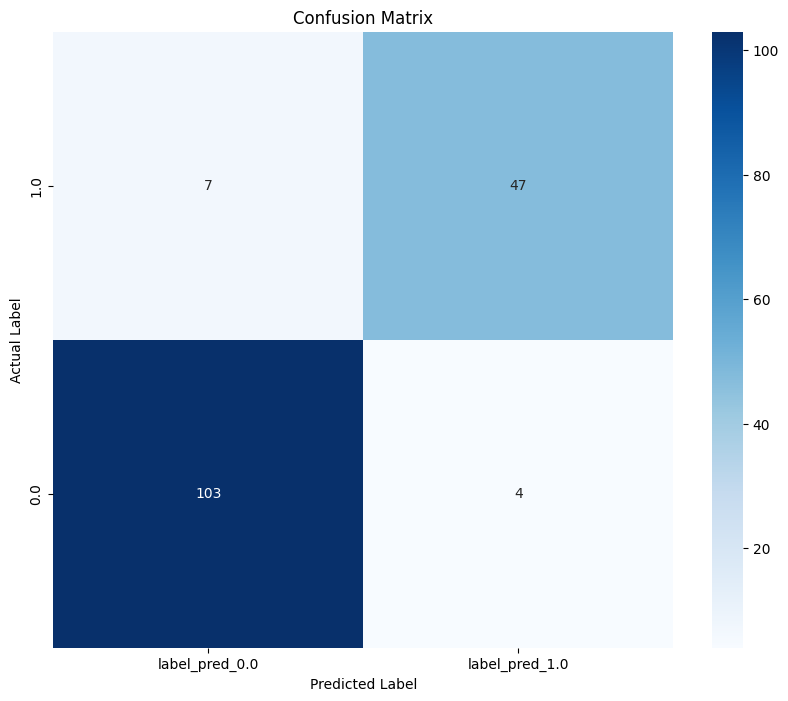

In [19]:
confusion_matrix = predictions_rf.crosstab("Survived", "prediction")
confusion_matrix = confusion_matrix.toDF(*["label_pred_" + c if c != "Survived_prediction" else "Actual_Label" for c in confusion_matrix.columns])
confusion_matrix_pd = confusion_matrix.toPandas()
confusion_matrix_pd.set_index('Actual_Label', inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_pd, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


### Terbukti dengan penambahan fitur untuk melakukan klasifikasi pada RandomForest dengan seed 1917 dapat meningkatkan akurasi